# Relatório TP1 - Coletor

* Arthur Severo
* Pedro Santos
* Victor Le Roy

Página descrevendo o coletor: https://vmleroy.github.io/ri-crawler-page/

# Descrição do coletor e principais desafios

O crawler, batizado Linkin-Crawken-Bot, foi desenvolvido com base numa arquitetura formada por um ```escalonador, coletor de página e os domínios``` utilizando conceitos da programação orientada à objetos. 

* **Descrição do coletor:**

    * ```Domínio (domain)```: Classe que representa cada um dos endereços a serem coletados, contendo atributos e funções utilitárias que indicam ao coletor o seu URL e se este pode ser visitado em dado momento.

    * ```Escalonador (scheduler)```: Módulo responsável por controlar o acesso do coletor aos domínios, contém funções utilitárias que determinam a sequência de domínios à serem visitados e se estes podem ser acessados (baseado nas propriedades do domínio), além de propriedades que determinam limites de complexidade da atuação do coletor e histórico de visitas.

    * ```Coletor de página (page_fetcher)```: Efetua a coleta de dados propriamente dita, dado que tem permissão de acesso dada pelo escalonador, por meio da extração do conteúdo HTML de cada página e análise deste em busca de novos links. Obtidos os novos endereços, estes serão adicionados à lista de visitações futuras e, assim, a execução será a mesma até que se alcance o limite determinado pelo escalonador.

* **Principais desafios:**

1. Tivemos problemas ao lidar com os arquivos ```robots.txt``` porque, em alguns sites, este arquivo era recebido com conteúdo vazio. Para lidar com este tipo de arquivo, criamos uma exceção que permite o acesso ao site, uma vez que não foi definida nenhuma restrição.

2. Outro problema recorrente está relacionado às threads. Tivemos dificuldades na coleta de links diferentes de forma simultânea dado que, em alguns casos a depender do tamanho da busca, as threads entram em deadlock. Este é o problema que teve a maior recorrência e ainda não conseguimos solucioná-lo por completo porém a busca ocorre corretamente pois os erros são ignorados em tempo de execução.

3. Outro grande desafio foi o de armazenar 1 milhão de páginas. A lógica, em tese, é algo simples, porém a busca demorou cerca de 30 horas para ser concluída e tivemos que executá-la uma segunda vez com seeds diferentes para que fosse possível salvar todas as páginas do desafio. Por fim, a outra dificuldade deste desafio foi o espaço de armazenamento necessário.

* **Decisões:**

Como já dito, utilizamos uma arquitetura composta de classes scheduler, page fetcher e domains. Os métodos "tageados" como synchronized no scheduler foram: count_fetched_page, has_finished_crawl, can_add_page, add_new_page, get_new_url. Para compreender a ocorrência de erros foi necessária a realização de diversos testes para entender o que estaria acontecendo e tentar solucionar quaisquer problemas. Para o armazenamento dos arquivos seguimos um modelo em que cada arquivo tem seu nome como o endereço do site buscado e o arquivo salvo em bytes para evitar erros de enconding (uma melhor explicação será demonstrada na seção do desafio).  

* **Seeds:**

As seeds utilizadas nos testes foram as seguintes:
* http://www.globo.com/
* http://www.cnpq.br/
* http://www.uol.com.br/
* https://www.uai.com.br/
* https://www.terra.com.br/
* https://www.bbc.com/
* https://www.tecmundo.com.br/
* https://www.olhardigital.com.br/
* https://www.estadao.com.br/ 
* https://www.em.com.br/
* https://www.gazetadopovo.com.br/
* https://www.correiobraziliense.com.br/

*O output dos testes pode ser encontrado no diretório ```"results"``` ou clicando no link <https://drive.google.com/drive/folders/17AXJyyxd3dps66T80tXL8EUdWGr5RdtH>* 

* **Criterio de exclusão dos robôs:**

Como critério de exclusão, foi seguido o ```robots.txt``` oferecidos por cada domínio acessado. Caso este arquivo esteja vazio, foi liberado o acesso geral no site buscado.

* ```Teste da velocidade das threads```

Esse teste precisa de uma extensao a mais, portanto, caso nao tenha instalado, deve rodar o codigo abaixo

In [ ]:
!pip3 install matplotlib

URL [0]: http://www.globo.com/
URL [1]: http://www.cnpq.br/
URL [2]: http://www.uol.com.br/
URL [3]: https://www.uai.com.br/
URL [4]: https://www.terra.com.br/
URL [5]: https://www.bbc.com/
URL [6]: https://www.tecmundo.com.br/
URL [7]: https://www.olhardigital.com.br/
URL [8]: https://www.estadao.com.br/
URL [9]: https://www.em.com.br/
URL [10]: https://www.gazetadopovo.com.br/
URL [11]: https://www.correiobraziliense.com.br/
URL [12]: https://minhaconta.globo.com
URL [13]: https://g1.globo.com/?utm_source=globo.com&utm_medium=menuburguer
URL [14]: https://oglobo.globo.com/?utm_source=globo.com&utm_medium=menuburguer
URL [15]: https://valor.globo.com/?utm_source=globo.com&utm_medium=menuburguer
URL [16]: https://globoesporte.globo.com/?utm_source=globo.com&utm_medium=menuburguer
URL [17]: https://ge.globo.com/cartola/?utm_source=globocom&utm_medium=menuburguer&utm_campaign=c2022_10_cartola_cartola-2022_alcance&utm_content=MEN_cartola-2022
URL [18]: https://vitrine.globo.com/assine/glo

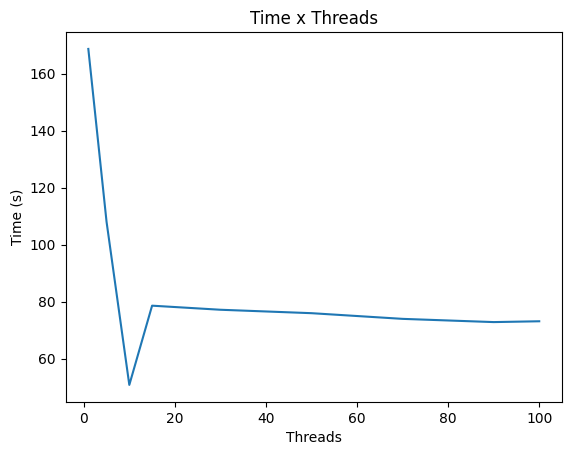

In [1]:
from tests.test_thread import test_threads
test_threads()

Array de resultados finais:

In [ ]:
[
  (1, 168.69212460517883), 
  (5, 108.05137753486633), 
  (10, 50.750852823257446), 
  (15, 78.56726789474487), 
  (30, 77.1370940208435), 
  (50, 75.93313789367676), 
  (70, 73.9374372959137), 
  (90, 72.80627202987671), 
  (100, 73.09327054023743)
]

Resultado gráfico:

<img style="float:left" src="imgs/threads-test-output.png">

Percebe-se uma tendência de diminuição do tempo conforme aumenta-se a quantidade de threads, porém, ao chegar nas 15/16 threads começamos a observar que o valor se estabiliza. Isso acontece pois o processador possui apenas 16 threads para trabalhar. O que surpreendeu neste teste foi o fato de que, em 10 threads, houve o valor ótimo de trabalho pois era esperado que as 15/16 threads fossem as mais rápidas. Isso pode ter acontecido por sorte, uma vez que outros processos mais pesados estavam sendo paralelamente executados no computador.

* ```Teste com 1 milhao de paginas salvas em "pages"```

Neste teste foi realizado a varredura de 1 milhão de páginas ininterruptamente, utilizando as mesmas URLs anteriores.

In [ ]:
from tests.test_pages_saving import test_1M_pages_saving_files
test_1M_pages_saving_files()

A varredura anterior foi realizada com sucesso, porém, foram armazendas, aproximadamente, 960 mil páginas. Isto aconteceu por consequência de algum erro interno, que provavelmente tem relação com o acesso de mútuo de diferentes threads a um mesmo método, o que fez com que páginas diferentes fosses acessadas ao mesmo tempo. Desta forma, para finalizar o procedimento de salvar as 1 milhão de páginas, foi realizada mais uma varredura em 50 mil páginas com domínios diferentes dos utilizados anteriormente, para tentar evitar que seja buscada uma página já salva anteriormente. As novas URLs são:

* https://www.youtube.com/
* https://crunchyroll.com/
* https://www.reddit.com

O print a seguir ilustra o resultado obtido na primeira varredura. Uma observação a ser destacada deste print é que o Jupyter teve problemas enquanto rodava o crawler e, por conta disso, o output foi deletado. Porém ainda foi possível resgatar o output como arquivo de texto, que está salvo com o título "1M-pages-output-1k-threads.rar". O tempo percorrido para finalizar o processo está presente no code do Jupyter. Uma outra observação importante a se notar é que após o teste realizado, fizemos uma refatoração de código e, por conta disso, tanto o caminho quanto o nome do teste foram alterados.

<img style="float:left" src="imgs/1M-pages-test-final-result.png">



In [ ]:
from tests.test_pages_saving import test_50k_pages_saving_files
test_50k_pages_saving_files()

Após a execução do último teste, foi possível obter 1 milhão de arquivos salvos, como mostrado no print abaixo:

<img style="float:left" src="imgs/1M-pages-completed.png">

Cada arquivo foi salvo da seguinte maneira:

* Nome do arquivo --> URL com caracteres invalidos transformados em "#" --> Exemplo: https://www.google.com/params = google.com#params
* 1a linha --> URL: https://www.google.com/params
* Resto do arquivo --> HTML da página requisitada

<img style="float:left" src="imgs/example-saved-page.png">